# Joseph Korban's Notebook

## Goal: DL Model for 30 days


#### Preliminary Steps

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

import tensorflow as tf
from crypto_assist.data_preprocess import preprocessor_not_scaled


            time      open      high       low     close    volume BTC  \
0     2017-08-17   4261.48   4485.39   4200.74   4285.08    795.150377   
1     2017-08-18   4285.08   4371.52   3938.77   4108.37   1199.888264   
2     2017-08-19   4108.37   4184.69   3850.00   4139.98    381.309763   
3     2017-08-20   4139.98   4211.08   4032.62   4086.29    467.083022   
4     2017-08-21   4069.13   4119.62   3911.79   4016.00    691.743060   
...          ...       ...       ...       ...       ...           ...   
2299  2023-12-03  39450.35  40250.00  39274.86  39972.26  26710.653350   
2300  2023-12-04  39972.26  42420.00  39972.26  41991.10  79272.330590   
2301  2023-12-05  41991.10  44488.00  41414.00  44073.32  67490.746440   
2302  2023-12-06  44073.82  44297.21  43335.28  43762.69  51431.104920   
2303  2023-12-07  43762.69  44047.33  42821.10  43273.14  47103.268450   

        volume USD        RSI  RSI_class        ADX  ADX_class  
0     3.454770e+06  50.000000          0   0.0

In [2]:
# For Jupyter only


df = preprocessor_not_scaled('BTCUSDT_daily.csv','final_text_df.csv','social_number_data.csv','FearAndGreedIndex.csv')
df_new = df.drop(columns=['date','volume BTC','twitter_favourites','reddit_active_users','twitter_followers','RSI_class','ADX_class'])
df_new


            time      open      high       low     close    volume BTC  \
0     2017-08-17   4261.48   4485.39   4200.74   4285.08    795.150377   
1     2017-08-18   4285.08   4371.52   3938.77   4108.37   1199.888264   
2     2017-08-19   4108.37   4184.69   3850.00   4139.98    381.309763   
3     2017-08-20   4139.98   4211.08   4032.62   4086.29    467.083022   
4     2017-08-21   4069.13   4119.62   3911.79   4016.00    691.743060   
...          ...       ...       ...       ...       ...           ...   
2299  2023-12-03  39450.35  40250.00  39274.86  39972.26  26710.653350   
2300  2023-12-04  39972.26  42420.00  39972.26  41991.10  79272.330590   
2301  2023-12-05  41991.10  44488.00  41414.00  44073.32  67490.746440   
2302  2023-12-06  44073.82  44297.21  43335.28  43762.69  51431.104920   
2303  2023-12-07  43762.69  44047.33  42821.10  43273.14  47103.268450   

        volume USD        RSI  RSI_class        ADX  ADX_class  
0     3.454770e+06  50.000000          0   0.0

,open,high,low,close,volume USD,RSI,ADX,FAGI_score,scored_title,scored_text,average_score,reddit_subscribers,reddit_comments_per_day,FAGI_sentiment_encoded
0,4261.48,4485.39,4200.74,4285.08,3.454770e+06,50.000000,0.000000,50.0,0.000000,0.000000,0.000000,1.000000e+03,699.824346,2.0
1,4285.08,4371.52,3938.77,4108.37,5.086958e+06,50.000000,0.000000,50.0,0.000000,0.000000,0.000000,1.419855e+03,699.824346,2.0
2,4108.37,4184.69,3850.00,4139.98,1.549484e+06,50.000000,0.000000,50.0,0.000000,0.000000,0.000000,1.839711e+03,699.824346,2.0
3,4139.98,4211.08,4032.62,4086.29,1.930364e+06,50.000000,0.000000,50.0,0.000000,0.000000,0.000000,2.259566e+03,699.824346,2.0
4,4069.13,4119.62,3911.79,4016.00,2.797232e+06,50.000000,0.000000,50.0,0.000000,0.000000,0.000000,2.679422e+03,699.824346,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,39450.35,40250.00,39274.86,39972.26,1.059861e+09,70.702721,44.436432,73.0,0.324950,0.944111,0.634530,2.594931e+06,699.824346,3.0
2300,39972.26,42420.00,39972.26,41991.10,3.285737e+09,77.134115,45.836661,74.0,0.400351,0.543259,0.471805,2.594931e+06,699.824346,3.0
2301,41991.10,44488.00,41414.00,44073.32,2.890205e+09,81.616552,47.693335,75.0,0.344162,0.655111,0.499637,2.594931e+06,699.824346,3.0
2302,44073.82,44297.21,43335.28,43762.69,2.256980e+09,79.124603,49.417390,72.0,0.453002,0.488086,0.470544,2.594931e+06,699.824346,3.0


In [3]:
# For Google Colab only


# df_new = pd.read_csv('/content/FINAL.csv')


#### Assignments:
- Targets  
- Number of targets
- Number of features


In [4]:
# Can change later

N_FEATURES = df_new.shape[1]  # All features other than time
N_TARGETS = 1                      # Prediciting only 1 target (close price)
TARGET = 'close'


## Preparing the dataset for DL Model

### Step 1. Creating many folds

#### Assignments:
- Fold Length   
- Fold Size
- Train Test Ratio


In [5]:
# Can change later

# Since we have data for about 6.3 years, and bitcoin is volatile, we will asssume fold lengths of 1 quarter
# 60 daily for training and 30 for testing

FOLD_LENGTH = 365 * 4      # Assume fold length of 1 quarter
FOLD_STRIDE = 365         # Assume stride every 10 days
TRAIN_TEST_RATIO = 0.67   # Two-thirds split ratio


#### * Implement the Get Folds Function:
- Takes in df, fold length, fold stride
- Returns a list of folds (each fold being a dataframe)

In [6]:
# Goes through the dataframe and creates equal sized folds of FOLD_LENGTH
# starting at 0 and at each FOLD_STRIDE until it crosses len(df)

def get_folds(df: pd.DataFrame,
    fold_length: int,
    fold_stride: int) -> list[pd.DataFrame]:

    folds = []
    for index in range(0, fold_length, fold_stride):
        if index + fold_length > len(df):
            break
        fold = df.iloc[index:index + fold_length,:]
        folds.append(fold)
    return folds


In [7]:
folds = (get_folds(df_new,FOLD_LENGTH,FOLD_STRIDE))
print(f'Number of folds created were {len(folds)}')
print(f'Each with a shape equal to {folds[0].shape}.')


Number of folds created were 3
Each with a shape equal to (1460, 14).


### Step 2. Temporal Train Test Split for one fold

#### Focusing on the last fold for now

In [8]:
fold = folds[-1]


#### Assignments:
- Input Length : Selected period selected for forecasting
- Output Length : Selected period we want to predict


In [9]:
# Can change later

INPUT_LENGTH = 365 # We can assume 7 days for a forecating period
OUTPUT_LENGTH = 90           # If we want predict one week ahead
TEMP_TRAIN_TEST_RATIO = 0.8 # How we want to split each fold (can be same as train test ratio)


#### * Implement the Temporal Train Test Split Function:
- Takes in a fold, temporal train test ratio, input length
- Returns a tuple of (fold_train, fold_test), each as a dataframe

In [10]:
# Splitting one fold into train and test chronologically,
# so we can later sample many (Xi,yi) pairs (input and output lengths)

def temporal_train_test_split(fold:pd.DataFrame,
                            temp_train_test_ratio: float,
                            input_length: int) -> tuple[pd.DataFrame]:
    # Train set
    last_train_index = round(temp_train_test_ratio * len(fold))
    fold_train = fold.iloc[0:last_train_index, :]

    #Test Set
    first_test_index = last_train_index - input_length
    fold_test = fold.iloc[first_test_index:, :]

    return (fold_train,fold_test)


In [11]:
(fold_train, fold_test) = temporal_train_test_split(fold, TEMP_TRAIN_TEST_RATIO, INPUT_LENGTH)


In [12]:
fold_train.shape, fold_test.shape


((1168, 14), (657, 14))

### Step 3. Create (X, y) sequences

### Option 1. Random Sampling

#### Now that we split our fold into trian and test we have to create 2 functions
- One that will return a single sequence of (Xi, yi) (from fold train for training, and from fold test for evaluating)
- Another that will call the first function many times over creating 3-D arrays of multiple sequences (X, y)

#### * Implement the Get (Xi, yi) function (using the random method):
- Takes in a fold, input length ,output length
- Returns a single sequence of (Xi, yi) as a 2-D DataFrame

In [13]:
STRIDE = 1


In [14]:
# Given a fold (could be train fold for testing or test fold for evaluating),
# it will return a sequence of (Xi,yi) based on input and output lengths,
# starting from a random point.

def get_Xi_yi_7(first_index: int,
              fold: pd.DataFrame,
              input_length: int,
              output_length: int) -> tuple[np.ndarray, np.ndarray]:
    '''
    - extracts one sequence from a fold
    - returns a pair (Xi, yi) with:
        * len(Xi) = `input_length` and Xi starting at first_index
        * len(yi) = `output_length`
        * last_Xi and first_yi separated by the gap = horizon -1
    '''

    Xi_start = first_index
    Xi_last = Xi_start + input_length
    yi_start = Xi_last
    yi_last = yi_start + output_length

    Xi = fold[Xi_start:Xi_last]
    yi = fold[yi_start:yi_last][TARGET]

    return (Xi, yi)


In [15]:
def get_X_y_7(fold: pd.DataFrame,             input_length: int,
             output_length: int,
             stride: int,
             shuffle=True) -> tuple[np.ndarray, np.ndarray]:
    """
    - Uses `data`, a 2D-array with axis=0 for timesteps, and axis=1 for (targets+covariates columns)
    - Returns a Tuple (X,y) of two ndarrays :
        * X.shape = (n_samples, input_length, n_covariates)
        * y.shape =
            (n_samples, output_length, n_targets) if all 3-dimensions are of size > 1
            (n_samples, output_length) if n_targets == 1
            (n_samples, n_targets) if output_length == 1
            (n_samples, ) if both n_targets and lenghts == 1
    - You can shuffle the pairs (Xi,yi) of your fold
    """
    X = []
    y = []

    # Scanning the fold/data entirely with a certain stride
    for i in range(0, len(fold), stride):
        ## Extracting a sequence starting at index_i
        Xi, yi = get_Xi_yi_7(first_index=i,
                            fold=fold,
                            input_length=input_length,
                            output_length=output_length)
        ## Exits loop as soon as we reach the end of the dataset
        if len(yi) < output_length:
            break
        X.append(Xi)
        y.append(yi)

    X = np.array(X)
    y = np.array(y)
    y = np.squeeze(y)


    if shuffle:
        idx = np.arange(len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

    return X, y


In [16]:
X_train, y_train = get_X_y_7(fold=fold_train,
                           input_length=INPUT_LENGTH,
                           output_length=OUTPUT_LENGTH,
                           stride=STRIDE)
X_test, y_test = get_X_y_7(fold=fold_test,
                         input_length=INPUT_LENGTH,
                         output_length=OUTPUT_LENGTH,
                         stride=STRIDE)

print("Shapes for the training set:")
print(f"X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")

print("Shapes for the test set:")
print(f"X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")


Shapes for the training set:
X_train.shape = (714, 365, 14), y_train.shape = (714, 90)
Shapes for the test set:
X_test.shape = (203, 365, 14), y_test.shape = (203, 90)


## Modeling

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.layers import Lambda
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras import regularizers


### Step 1. Building a Baseline (dummy) model for comparisons

#### * Initialize the Baseline Model function based on last seen value

In [18]:
y_train.shape , y_test.shape


((714, 90), (203, 90))

In [19]:

def last_seen_value_baseline(X, y):

    # How many values do you want to predict in the future ?
    output_length = y.shape[-1]

    # For each sequence, let's consider the last seen value
    # and only the close column
    last_seen_values = X[:,-1, 3].reshape(-1,1)

    # We need to duplicate these values as many times as output_length
    repeated = np.repeat(last_seen_values, axis = 1, repeats = output_length)

    MAE = np.mean(np.abs(y - repeated))
    MAPE = np.mean(abs((y - repeated) / y)) * 100
    SMAPE = np.mean((abs(y - repeated)) / ((y + repeated)/2))* 100
    return MAE, MAPE, SMAPE, repeated[0]


In [20]:
baseline_score = last_seen_value_baseline(X_test, y_test)
baseline_score , y_test[0]


((3263.8520925013686,
  13.12644258432371,
  14.378779913116826,
  array([16226.94, 16226.94, 16226.94, 16226.94, 16226.94, 16226.94,
         16226.94, 16226.94, 16226.94, 16226.94, 16226.94, 16226.94,
         16226.94, 16226.94, 16226.94, 16226.94, 16226.94, 16226.94,
         16226.94, 16226.94, 16226.94, 16226.94, 16226.94, 16226.94,
         16226.94, 16226.94, 16226.94, 16226.94, 16226.94, 16226.94,
         16226.94, 16226.94, 16226.94, 16226.94, 16226.94, 16226.94,
         16226.94, 16226.94, 16226.94, 16226.94, 16226.94, 16226.94,
         16226.94, 16226.94, 16226.94, 16226.94, 16226.94, 16226.94,
         16226.94, 16226.94, 16226.94, 16226.94, 16226.94, 16226.94,
         16226.94, 16226.94, 16226.94, 16226.94, 16226.94, 16226.94,
         16226.94, 16226.94, 16226.94, 16226.94, 16226.94, 16226.94,
         16226.94, 16226.94, 16226.94, 16226.94, 16226.94, 16226.94,
         16226.94, 16226.94, 16226.94, 16226.94, 16226.94, 16226.94,
         16226.94, 16226.94, 16226.94,

### Step 2. Building an LSTM Model

#### * Define the SMAPE Metric

In [21]:
def smape(y_true, y_pred):
    return tf.reduce_mean(((abs(y_true - y_pred)) / ((y_true + y_pred)/2))* 100, axis=-1)


#### * Initialize the LSTM Model function

In [22]:
def init_model(X_train, y_train):

    # adam = optimizers.Adam(learning_rate=0.02)


    initial_learning_rate = 0.1 # Default Adam

    lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps = 500,    # every 500 iterations
    decay_rate = 0.5)      # we multiply the learning rate by the decay_rate


    adam = optimizers.Adam(learning_rate=lr_schedule)


    #reg_l2 = regularizers.L2(0.5)

    output_length = y_train.shape[1]

    normalizer = Normalization()
    normalizer.adapt(X_train)

    model = models.Sequential()

    model.add(normalizer)

    model.add(layers.LSTM(32,
                          activation='tanh',
                          return_sequences = True
                          ))
    model.add(layers.LSTM(16,
                          activation='tanh',
                          return_sequences = False
                          ))
    model.add(layers.Dense(10, activation='relu'
                           ))
    model.add(layers.Dense(5, activation='elu'
                           ))

    model.add(layers.Dense(output_length, activation='linear'))

    model.compile(loss='mse', optimizer=adam, metrics=["mse",'mae','mape',smape])

    return model


In [23]:
def fit_model(model: tf.keras.Model, verbose=1) -> tuple[tf.keras.Model, dict]:

    es = EarlyStopping(monitor = "val_loss",
                      patience = 30,
                      mode = "min",
                      restore_best_weights = True)

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)


    history = model.fit(X_train, y_train,
                        validation_split = 0.3,
                        shuffle = False,
                        batch_size = 16,
                        epochs = 50,
                        callbacks = [es,reduce_lr],
                        verbose = verbose)

    return model, history


#### * Define the plot history function

In [24]:
def plot_history(history):

    fig, ax = plt.subplots(1,2, figsize=(20,7))
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    return ax


In [25]:
model = init_model(X_train, y_train)

model, history = fit_model(model)


Epoch 1/50
32/32 [==============================] - 6s 111ms/step - loss: 1520853376.0000 - mse: 1520853376.0000 - mae: 36278.3008 - mape: 95.6859 - smape: 184.9817 - val_loss: 1163145856.0000 - val_mse: 1163145856.0000 - val_mae: 31034.1113 - val_mape: 75.2914 - val_smape: 124.0120 - lr: 0.0958
Epoch 2/50
32/32 [==============================] - 3s 94ms/step - loss: 435697376.0000 - mse: 435697376.0000 - mae: 17012.7070 - mape: 53.8296 - smape: 54.0766 - val_loss: 200585984.0000 - val_mse: 200585984.0000 - val_mae: 11653.0283 - val_mape: 42.2936 - val_smape: 32.4615 - lr: 0.0916
Epoch 3/50
32/32 [==============================] - 3s 92ms/step - loss: 205608592.0000 - mse: 205608592.0000 - mae: 11916.7432 - mape: 43.6724 - smape: 34.0492 - val_loss: 201597728.0000 - val_mse: 201597728.0000 - val_mae: 11738.8857 - val_mape: 41.7792 - val_smape: 32.7287 - lr: 0.0877
Epoch 4/50
32/32 [==============================] - 3s 99ms/step - loss: 164156944.0000 - mse: 164156944.0000 - mae: 10592.

array([<Axes: title={'center': 'MSE'}, xlabel='Epoch', ylabel='Loss'>,
       <Axes: title={'center': 'MAE'}, xlabel='Epoch', ylabel='MAE'>],
      dtype=object)

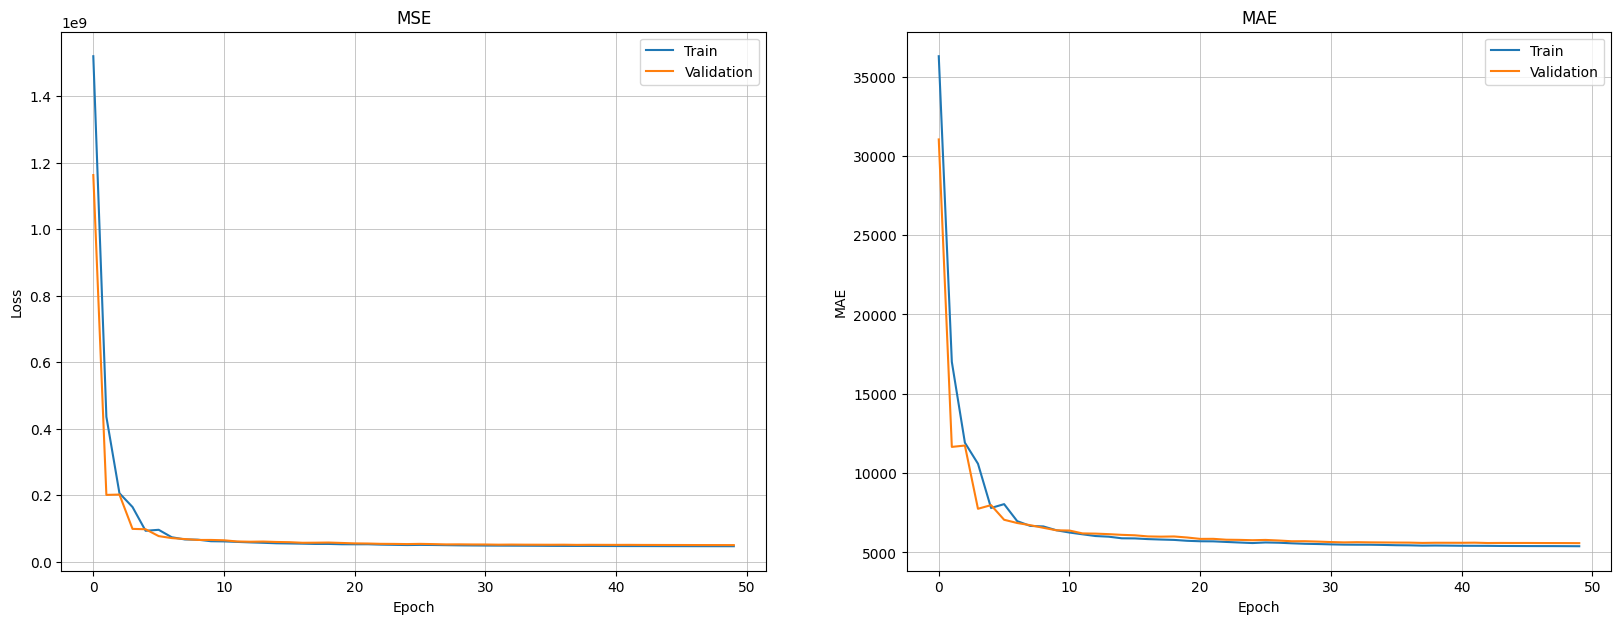

In [26]:
plot_history(history)


In [27]:
res = model.evaluate(X_test,y_test)
res


7/7 [==============================] - 0s 23ms/step - loss: 33277218.0000 - mse: 33277218.0000 - mae: 4366.0464 - mape: 18.5256 - smape: 19.3608


[33277218.0,
 33277218.0,
 4366.04638671875,
 18.525609970092773,
 19.360780715942383]

In [28]:
print(f'Improvement over baseline model is {((baseline_score[0] - res[2])/baseline_score[0])*100} %')


Improvement over baseline model is -33.76973781225104 %


In [29]:
X_test.shape , X_train.shape, y_test.shape, y_train.shape


((203, 365, 14), (714, 365, 14), (203, 90), (714, 90))

In [30]:
pf = pd.DataFrame(model.predict(X_test))   #, y_test[2]
pf['diff'] = pf.iloc[:][OUTPUT_LENGTH - 1] - pf.iloc[:][0]
pf['diff']


7/7 [==============================] - 1s 22ms/step


0      342.416016
1      324.373047
2      344.074219
3      170.869141
4      411.611328
          ...    
198    324.232422
199    342.353516
200    341.580078
201    334.671875
202    338.064453
Name: diff, Length: 203, dtype: float32

Did the model predict the correct movement up or down at the end of the forecast?

In [31]:
def end_of_forecast_predictions():
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for j in range(y_test.shape[0]):
        if model.predict(X_test)[j][-1] > model.predict(X_test)[j][0] and y_test[j][-1] > y_test[j][0]:
            TP += 1
        if model.predict(X_test)[j][-1] < model.predict(X_test)[j][0] and y_test[j][-1] < y_test[j][0]:
            TN += 1
        if model.predict(X_test)[j][-1] > model.predict(X_test)[j][0] and y_test[j][-1] < y_test[j][0]:
            FP += 1
        if model.predict(X_test)[j][-1] < model.predict(X_test)[j][0] and y_test[j][-1] > y_test[j][0]:
            FN += 1

    matrix = pd.DataFrame(np.array([[TN,FP],[FN,TP]]),index = ['Actual down','Actual up'])
    matrix.columns=['Predicted down','Predicted up']


    print (f'Accuracy = {100 * (TP + TN)/(TP + TN + FP + FN)} %')
    print (f'Precision = {100 * TP /(TP + FP)} %')
    print (f'Recall = {100 * TP /(TP + FN)} %')
    print (f'f1 Score -  = {(2 * (TP /(TP + FP)) * (TP /(TP + FN))) / ((TP /(TP + FP)) + (TP /(TP + FN)))}')

    return matrix


In [32]:
end_of_forecast_predictions()


7/7 [==============================] - 0s 22ms/step
Accuracy = 94.08866995073892 %
Precision = 94.08866995073892 %
Recall = 100.0 %
f1 Score -  = 0.9695431472081217


,Predicted down,Predicted up
Actual down,0,12
Actual up,0,191


How many total correct movements did
it predict day to day?

In [33]:
def daily_movenemt_predictions():
    TPD = 0
    TND = 0
    FPD = 0
    FND = 0
    for j in range(y_test.shape[0]):
        for i in range(y_test.shape[1]-1):
            if (model.predict(X_test)[j][i+1] > model.predict(X_test)[j][i] and y_test[j][i+1] > y_test[j][i]):
                TPD +=1
            if (model.predict(X_test)[j][i+1] < model.predict(X_test)[j][i] and y_test[j][i+1] < y_test[j][i]):
                TND +=1
            if (model.predict(X_test)[j][i+1] > model.predict(X_test)[j][i] and y_test[j][i+1] < y_test[j][i]):
                FPD +=1
            if (model.predict(X_test)[j][i+1] < model.predict(X_test)[j][i] and y_test[j][i+1] > y_test[j][i]):
                FND +=1

    matrix2 = pd.DataFrame(np.array([[TND,FPD],[FND,TPD]]),index = ['Actual down daily','Actual up daily'])

    matrix2.columns=['Predicted down daily','Predicted up daily']

    print (f'Accuracy (Daily) = {100 * (TPD + TND)/(TPD + TND + FPD + FND)} %')
    print (f'Precision (Daily) = {100 * TPD /(TPD + FPD)} %')
    print (f'Recall (Daily) = {100 * TPD /(TPD + FND)} %')
    print (f'f1 Score (Daily) = {(2 * (TPD /(TPD + FPD)) * (TPD /(TPD + FND))) / ((TPD /(TPD + FPD)) + (TPD /(TPD + FND)))}')

    return matrix2


In [34]:
daily_movenemt_predictions()


1/7 [===>..........................] - ETA: 0s

KeyboardInterrupt: 

#### All this was for one fold, now we need to Cross validate on all folds

### Step 3. Cross Validation

#### * Funtion to Cross Validate for Baseline and LSTM Models in for loop

In [ ]:
def cross_validate_baseline_and_lstm():
    '''
    This function cross-validates
    - the "last seen value" baseline model
    - the RNN model
    '''

    list_of_mae_baseline_model = []
    list_of_mae_recurrent_model = []

    # 0 - Creating folds
    # =========================================
    folds = get_folds(df_new, FOLD_LENGTH, FOLD_STRIDE)

    for fold_id, fold in enumerate(folds):

        # 1 - Train/Test split the current fold

        (fold_train, fold_test) = temporal_train_test_split(fold, TRAIN_TEST_RATIO, INPUT_LENGTH)

        X_train, y_train = get_X_y_7(fold=fold_train,
                           input_length=INPUT_LENGTH,
                           output_length=OUTPUT_LENGTH,
                           stride=STRIDE)
        X_test, y_test = get_X_y_7(fold=fold_train,
                           input_length=INPUT_LENGTH,
                           output_length=OUTPUT_LENGTH,
                           stride=STRIDE)

        # 2 - Modelling

        ##### Baseline Model
        mae_baseline = last_seen_value_baseline(X_test, y_test)[0]
        list_of_mae_baseline_model.append(mae_baseline)
        print("-"*50)
        print(f"MAE baseline fold n°{fold_id} = {round(mae_baseline, 2)}")

        ##### LSTM Model
        model = init_model(X_train, y_train)
        history = fit_model(model)
        res = model.evaluate(X_test, y_test, verbose=0)
        mae_lstm = res[2]
        list_of_mae_recurrent_model.append(mae_lstm)
        print(f"MAE LSTM fold n°{fold_id} = {round(mae_lstm, 2)}")

        ##### Comparison LSTM vs Baseline for the current fold
        print(f"🏋🏽‍♂️ improvement over baseline: {round((1 - (mae_lstm/mae_baseline))*100,2)} % \n")

    return list_of_mae_baseline_model, list_of_mae_recurrent_model


In [ ]:
mae_baselines, mae_lstms = cross_validate_baseline_and_lstm()


In [ ]:
print(f"average percentage improvement over baseline = {round(np.mean(1 - (np.array(mae_lstms)/np.array(mae_baselines))),2)*100}%")
